In [9]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
feature_list_filename = "/home/ubuntu/HeLa_20KInt/HeLa_20KInt-feature-list.csv"
feature_list_df = pd.read_csv(feature_list_filename)

In [11]:
feature_list_df.head()

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_scan_lower,base_peak_scan_upper,base_peak_centroid_rt,base_peak_std_dev_rt,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper
0,1,3,1960.915588,680.366484,4013.127018,654.717577,4005.957188,4021.318195,668,688,...,668,688,4013.130741,3.845270,4005.957188,4021.318195,654.645757,0.002612,654.619261,654.675743
1,2,2,1247.602054,574.224714,1085.766969,625.127677,1075.177570,1097.628037,565,585,...,565,585,1085.746282,2.179954,1075.177570,1097.628037,624.809083,0.002324,624.778556,624.833736
2,3,2,1789.900380,379.472823,4433.432999,896.216859,4421.919624,4439.635599,367,387,...,367,387,4436.255100,2.552869,4421.919624,4439.635599,896.459161,0.003005,896.413464,896.498444
3,4,2,1405.719333,527.432220,4034.358108,704.126734,4022.496117,4044.962866,519,539,...,519,539,4034.498268,3.537136,4024.859526,4044.962866,703.867085,0.005701,703.834050,703.900983
4,5,2,2214.082282,231.310785,5002.872698,1108.270682,4991.075059,5008.786578,221,241,...,221,241,5002.369948,1.875718,4991.075059,5008.786578,1108.049241,0.003916,1107.997794,1108.087022


In [12]:
feature_list_df['mono_peak_fwhm_scan_lower'] = feature_list_df.mono_peak_centroid_scan - (2.355/2*feature_list_df.mono_peak_std_dev_scan)
feature_list_df['mono_peak_fwhm_scan_upper'] = feature_list_df.mono_peak_centroid_scan + (2.355/2*feature_list_df.mono_peak_std_dev_scan)

In [13]:
feature_list_df['base_peak_fwhm_scan_lower'] = feature_list_df.base_peak_centroid_scan - (2.355/2*feature_list_df.base_peak_std_dev_scan)
feature_list_df['base_peak_fwhm_scan_upper'] = feature_list_df.base_peak_centroid_scan + (2.355/2*feature_list_df.base_peak_std_dev_scan)

In [14]:
feature_list_df[['base_peak_fwhm_scan_lower','base_peak_fwhm_scan_upper','base_peak_scan_lower','base_peak_scan_upper']].head()

,base_peak_fwhm_scan_lower,base_peak_fwhm_scan_upper,base_peak_scan_lower,base_peak_scan_upper
0,674.107077,686.941959,668,688
1,567.336306,580.910679,565,585
2,372.526575,387.271590,367,387
3,521.964807,534.363408,519,539
4,223.343388,237.734032,221,241


In [15]:
feature_list_df.iloc[0]

feature_id                   1.000000e+00
charge_state                 3.000000e+00
monoisotopic_mass            1.960916e+03
feature_centroid_scan        6.803665e+02
feature_centroid_rt          4.013127e+03
feature_centroid_mz          6.547176e+02
feature_start_rt             4.005957e+03
feature_end_rt               4.021318e+03
feature_scan_lower           6.680000e+02
feature_scan_upper           6.880000e+02
feature_summed_intensity     7.033805e+06
isotope_count                2.000000e+00
mono_peak_id                 1.000000e+00
mono_peak_centroid_scan      6.805245e+02
mono_peak_std_dev_scan       5.450056e+00
mono_peak_scan_lower         6.680000e+02
mono_peak_scan_upper         6.880000e+02
mono_peak_centroid_rt        4.013131e+03
mono_peak_std_dev_rt         3.845270e+00
mono_peak_rt_lower           4.005957e+03
mono_peak_rt_upper           4.021318e+03
mono_peak_centroid_mz        6.546458e+02
mono_peak_std_dev_mz         2.612086e-03
mono_peak_mz_lower           6.546

In [16]:
len(feature_list_df[feature_list_df.mono_peak_id!=feature_list_df.base_peak_id])

41379

In [17]:
instrument_db_name = '/home/ubuntu/HeLa_20KInt_2KIT_Slot1-46_01_1179.d/analysis.tdf'
db_conn = sqlite3.connect(instrument_db_name)
isolation_window_df = pd.read_sql_query("select * from PasefFrameMsMsInfo", db_conn)
db_conn.close()

In [18]:
isolation_window_df.head()

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,CollisionEnergy,Precursor
0,3,507,532,742.744835,2.427448,36.96,1
1,3,549,574,709.235759,2.092358,36.96,2
2,3,602,627,594.235088,2.000000,36.96,3
3,3,643,668,503.527768,2.000000,36.96,4
4,3,684,709,552.063870,2.000000,31.92,5


In [19]:
len(isolation_window_df)

486938

In [20]:
converted_db_name = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'
db_conn = sqlite3.connect(converted_db_name)
frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties", db_conn)
db_conn.close()

In [21]:
frame_properties_df.head()

,frame_id,retention_time_secs
0,1,0.699237
1,2,0.801334
2,3,0.989283
3,4,1.096483
4,5,1.203557


In [22]:
isolation_window_df = pd.merge(isolation_window_df, frame_properties_df, how='left', left_on=['Frame'], right_on=['frame_id'])
isolation_window_df.drop(['frame_id', 'CollisionEnergy'], axis=1, inplace=True)

In [23]:
isolation_window_df.head(10)

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs
0,3,507,532,742.744835,2.427448,1,0.989283
1,3,549,574,709.235759,2.092358,2,0.989283
2,3,602,627,594.235088,2.000000,3,0.989283
3,3,643,668,503.527768,2.000000,4,0.989283
4,3,684,709,552.063870,2.000000,5,0.989283
5,3,765,790,416.202091,2.000000,6,0.989283
6,3,806,831,372.838373,2.000000,7,0.989283
7,3,868,893,367.323799,2.000000,8,0.989283
8,4,507,532,742.744835,2.427448,1,1.096483
9,4,568,593,598.471759,2.000000,9,1.096483


In [24]:
isolation_window_df['mz_lower'] = isolation_window_df.IsolationMz - (isolation_window_df.IsolationWidth / 2)
isolation_window_df['mz_upper'] = isolation_window_df.IsolationMz + (isolation_window_df.IsolationWidth / 2)

In [25]:
isolation_window_df.head(10)

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs,mz_lower,mz_upper
0,3,507,532,742.744835,2.427448,1,0.989283,741.531111,743.958559
1,3,549,574,709.235759,2.092358,2,0.989283,708.189580,710.281938
2,3,602,627,594.235088,2.000000,3,0.989283,593.235088,595.235088
3,3,643,668,503.527768,2.000000,4,0.989283,502.527768,504.527768
4,3,684,709,552.063870,2.000000,5,0.989283,551.063870,553.063870
5,3,765,790,416.202091,2.000000,6,0.989283,415.202091,417.202091
6,3,806,831,372.838373,2.000000,7,0.989283,371.838373,373.838373
7,3,868,893,367.323799,2.000000,8,0.989283,366.323799,368.323799
8,4,507,532,742.744835,2.427448,1,1.096483,741.531111,743.958559
9,4,568,593,598.471759,2.000000,9,1.096483,597.471759,599.471759


In [26]:
isolation_window_df['feature_id'] = 0

# For each feature, find all the isolation windows which would fit the feature's monoisotopic and base peaks
for idx in range(len(feature_list_df)):
    feature_df = feature_list_df.iloc[idx]
    feature_id = feature_df.feature_id.astype(int)
    indexes = isolation_window_df.index[
                        (
                            ((feature_df.mono_peak_scan_upper >= isolation_window_df.ScanNumBegin) &
                             (feature_df.mono_peak_scan_upper <= isolation_window_df.ScanNumEnd)) |
                            ((feature_df.mono_peak_scan_lower >= isolation_window_df.ScanNumBegin) &
                            (feature_df.mono_peak_scan_lower <= isolation_window_df.ScanNumEnd))
                        ) &
                        (feature_df.mono_peak_centroid_mz >= isolation_window_df.mz_lower) &
                        (feature_df.mono_peak_centroid_mz <= isolation_window_df.mz_upper) &
                        (feature_df.mono_peak_rt_lower <= isolation_window_df.retention_time_secs) &
                        (feature_df.mono_peak_rt_upper >= isolation_window_df.retention_time_secs)
                       ]
    if len(indexes) > 0:
        isolation_window_df.loc[indexes,'feature_id'] = feature_id

In [27]:
feature_isolation_matches_df = pd.merge(feature_list_df, isolation_window_df, how='right', left_on=['feature_id'], right_on=['feature_id'])

In [28]:
feature_isolation_matches_df.head()

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_fwhm_scan_upper,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs,mz_lower,mz_upper
0,34,3.0,2227.223439,446.949144,5574.123577,743.625599,5565.209670,5587.631865,438.0,458.0,...,454.898617,51989,421,446,743.512336,2.435123,222081,5585.918437,742.294774,744.729897
1,60,3.0,1767.981504,693.999467,4855.758839,590.626521,4844.676321,4867.110040,685.0,705.0,...,702.063280,45149,677,702,590.661871,2.000000,173852,4849.076479,589.661871,591.661871
2,60,3.0,1767.981504,693.999467,4855.758839,590.626521,4844.676321,4867.110040,685.0,705.0,...,702.063280,45150,677,702,590.661871,2.000000,173852,4849.183076,589.661871,591.661871
3,60,3.0,1767.981504,693.999467,4855.758839,590.626521,4844.676321,4867.110040,685.0,705.0,...,702.063280,45171,678,703,590.664798,2.000000,173961,4851.437332,589.664798,591.664798
4,68,2.0,1505.747245,457.823503,4442.957084,754.187904,4433.733502,4453.805803,447.0,467.0,...,464.456356,41309,445,470,754.335170,2.543352,152450,4436.848388,753.063494,755.606846


In [29]:
len(feature_isolation_matches_df.feature_id.unique())

82205

In [30]:
len(feature_list_df.feature_id.unique())

167291

In [31]:
features_with_isolation_matches_df = pd.merge(feature_list_df, isolation_window_df, how='left', left_on=['feature_id'], right_on=['feature_id'])

In [32]:
len(features_with_isolation_matches_df)

280309

In [33]:
features_with_isolation_matches_df = features_with_isolation_matches_df.drop_duplicates(['feature_id'])

In [34]:
len(features_with_isolation_matches_df)

167291

In [251]:
unmatched_features_df = features_with_isolation_matches_df[features_with_isolation_matches_df.Frame.isna()].copy()

In [252]:
len(unmatched_features_df)

85087

In [253]:
matched_features_df = features_with_isolation_matches_df[~features_with_isolation_matches_df.Frame.isna()].copy()

In [254]:
len(matched_features_df)

82204

In [255]:
# find an intense feature that didn't match an isolation window
unmatched_features_df.sort_values(by='feature_summed_intensity', ascending=False, inplace=True)

In [256]:
unmatched_features_df[['feature_id','feature_summed_intensity','Frame']].head(10)

,feature_id,feature_summed_intensity,Frame
50,52,12956981,NaN
112,103,9134628,NaN
159,144,9121479,NaN
36,37,8042947,NaN
3,4,8039223,NaN
9,10,7711999,NaN
115,106,7589943,NaN
239,213,7574094,NaN
190,166,7484959,NaN
1595,1357,7287507,NaN


In [257]:
feature_id_of_interest = 1357

In [258]:
feature = feature_list_df[feature_list_df.feature_id==feature_id_of_interest].iloc[0]

In [259]:
feature

feature_id                   1.357000e+03
charge_state                 2.000000e+00
monoisotopic_mass            1.197667e+03
feature_centroid_scan        6.390409e+02
feature_centroid_rt          2.837461e+03
feature_centroid_mz          6.002005e+02
feature_start_rt             2.826318e+03
feature_end_rt               2.848780e+03
feature_scan_lower           6.310000e+02
feature_scan_upper           6.490000e+02
feature_summed_intensity     7.287507e+06
isotope_count                5.000000e+00
mono_peak_id                 1.000000e+00
mono_peak_centroid_scan      6.391788e+02
mono_peak_std_dev_scan       4.383429e+00
mono_peak_scan_lower         6.310000e+02
mono_peak_scan_upper         6.490000e+02
mono_peak_centroid_rt        2.837624e+03
mono_peak_std_dev_rt         6.079036e+00
mono_peak_rt_lower           2.826318e+03
mono_peak_rt_upper           2.848780e+03
mono_peak_centroid_mz        5.998406e+02
mono_peak_std_dev_mz         2.298573e-03
mono_peak_mz_lower           5.998

In [260]:
feature_id = feature.feature_id

In [261]:
visualisation_mz_upper = feature.feature_centroid_mz + 5
visualisation_mz_lower = feature.feature_centroid_mz - 5
visualisation_scan_upper = feature.feature_scan_upper + 20
visualisation_scan_lower = feature.feature_scan_lower - 20
visualisation_rt_upper = feature.feature_end_rt
visualisation_rt_lower = feature.feature_start_rt

In [262]:
visualisation_scan_upper

669.0

In [263]:
visualisation_scan_lower

611.0

In [264]:
indexes = isolation_window_df.index[
                        (
                            ((isolation_window_df.mz_lower >= visualisation_mz_lower) &
                             (isolation_window_df.mz_lower <= visualisation_mz_upper)) |
                            ((isolation_window_df.mz_upper >= visualisation_mz_lower) &
                            (isolation_window_df.mz_upper <= visualisation_mz_upper))
                        ) &
                        (
                            ((isolation_window_df.ScanNumBegin >= visualisation_scan_lower) &
                             (isolation_window_df.ScanNumBegin <= visualisation_scan_upper)) |
                            ((isolation_window_df.ScanNumEnd >= visualisation_scan_lower) &
                            (isolation_window_df.ScanNumEnd <= visualisation_scan_upper))
                        ) &
                        (isolation_window_df.retention_time_secs >= visualisation_rt_lower) &
                        (isolation_window_df.retention_time_secs <= visualisation_rt_upper)
                       ]
isolation_windows_in_visualisation_area_df = isolation_window_df.loc[indexes]

In [265]:
isolation_windows_in_visualisation_area_df

,Frame,ScanNumBegin,ScanNumEnd,IsolationMz,IsolationWidth,Precursor,retention_time_secs,mz_lower,mz_upper,feature_id
184428,26327,588,613,606.124845,2.0,85775,2827.071438,605.124845,607.124845,104911
184505,26337,619,644,596.596448,2.0,85808,2828.145567,595.596448,597.596448,0
184527,26339,619,644,596.596448,2.0,85808,2828.360916,595.596448,597.596448,0
184795,26370,623,648,600.128470,2.0,85931,2831.695693,599.128470,601.128470,157081
184803,26371,586,611,601.645795,2.0,85936,2831.804461,600.645795,602.645795,42932
184899,26383,638,663,600.150140,2.0,85983,2833.097114,599.150140,601.150140,157081
184908,26384,638,663,600.150140,2.0,85983,2833.204782,599.150140,601.150140,157081
184997,26394,619,644,599.595579,2.0,86027,2834.280030,598.595579,600.595579,90479
185007,26395,619,644,599.595579,2.0,86027,2834.387118,598.595579,600.595579,90479
185255,26425,621,646,599.596202,2.0,86132,2837.612884,598.596202,600.596202,90479


In [266]:
indexes = feature_list_df.index[
                        (feature_list_df.feature_centroid_mz >= visualisation_mz_lower) &
                        (feature_list_df.feature_centroid_mz <= visualisation_mz_upper) &
                        (feature_list_df.feature_scan_lower >= visualisation_scan_lower) &
                        (feature_list_df.feature_scan_upper <= visualisation_scan_upper) &
                        (feature_list_df.feature_start_rt >= visualisation_rt_lower) &
                        (feature_list_df.feature_end_rt <= visualisation_rt_upper)
                       ]
features_in_visualisation_area_df = feature_list_df.loc[indexes]

In [267]:
features_in_visualisation_area_df

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper,mono_peak_fwhm_scan_lower,mono_peak_fwhm_scan_upper,base_peak_fwhm_scan_lower,base_peak_fwhm_scan_upper
271,273,2,1197.664792,631.106042,2834.090093,600.160327,2826.318217,2846.418554,625,645,...,2826.318217,2846.418554,599.839667,0.002238,599.812764,599.843659,625.491107,637.244244,625.491107,637.244244
1354,1357,2,1197.666534,639.040948,2837.461468,600.200496,2826.318217,2848.780444,631,649,...,2826.318217,2848.780444,599.840590,0.002299,599.816626,599.843659,634.017278,644.340254,634.017278,644.340254
11390,11431,2,1199.675739,641.372377,2836.061988,601.043089,2826.318217,2844.056567,628,648,...,2831.049952,2839.327993,600.845258,0.002207,600.821102,600.871348,635.212135,647.094609,635.212135,647.094609
21211,21294,2,1197.606361,635.375658,2841.774759,599.936669,2833.418433,2848.780444,626,646,...,2833.418433,2848.780444,599.810821,0.002466,599.789594,599.816626,629.579081,641.353165,629.579081,641.353165
23819,23922,2,1197.728342,621.300092,2840.699552,600.092870,2831.049952,2848.780444,611,631,...,2835.784439,2848.780444,599.871610,0.001930,599.866830,599.878416,615.559912,626.935375,615.559912,626.935375
37784,37991,2,1198.734550,641.820262,2836.248026,600.410710,2828.682132,2841.692121,633,650,...,2828.682132,2841.692121,600.374595,0.001974,600.368984,600.376711,638.023625,645.627015,638.023625,645.627015
39308,39528,2,1198.732874,630.981087,2839.822375,600.407837,2835.784439,2844.056567,620,640,...,2835.784439,2844.056567,600.373793,0.001912,600.368984,600.376711,623.560234,637.552564,623.560234,637.552564
43212,43475,2,1197.732891,649.350041,2843.349053,600.119956,2840.510671,2848.780444,642,656,...,2840.510671,2848.780444,599.874037,0.001574,599.870692,599.878416,647.356151,653.998287,647.356151,653.998287
47932,48242,2,1197.734647,659.335805,2842.178505,600.188108,2840.510671,2844.056567,653,663,...,2840.510671,2844.056567,600.375901,0.001573,600.372847,600.376711,660.282757,662.801278,654.254630,661.768625
58314,58728,4,2397.199619,660.470990,2833.808559,600.485583,2826.318217,2844.056567,648,668,...,2826.318217,2844.056567,600.558985,0.008883,600.527399,600.589225,654.136707,669.292797,652.301575,666.307045


In [268]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

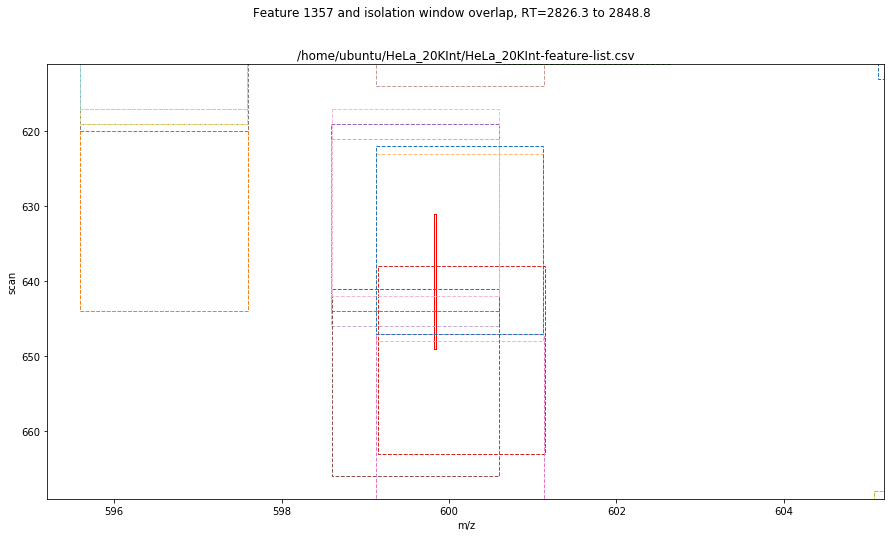

In [269]:
import matplotlib.patches as patches

f, ax1 = plt.subplots()
# add mono peak
mono_drift_range = feature.mono_peak_scan_upper-feature.mono_peak_scan_lower
mono_mz_range = feature.mono_peak_mz_upper-feature.mono_peak_mz_lower
mono_peak_rect = patches.Rectangle((feature.mono_peak_mz_lower,feature.mono_peak_scan_lower),mono_mz_range,mono_drift_range,linewidth=1,linestyle='-',edgecolor='r',facecolor='none', label='mono')
ax1.add_patch(mono_peak_rect)

# add base peak
base_drift_range = feature.base_peak_scan_upper-feature.base_peak_scan_lower
base_mz_range = feature.base_peak_mz_upper-feature.base_peak_mz_lower
base_peak_rect = patches.Rectangle((feature.base_peak_mz_lower,feature.base_peak_scan_lower),base_mz_range,base_drift_range,linewidth=1,linestyle='-',edgecolor='r',facecolor='none', label='base')
ax1.add_patch(base_peak_rect)

# add isolation windows
for idx in range(len(isolation_windows_in_visualisation_area_df)):
    window = isolation_windows_in_visualisation_area_df.iloc[idx]
    drift_range = window.ScanNumEnd - window.ScanNumBegin
    mz_range = window.mz_upper - window.mz_lower
    isolation_window_rect = patches.Rectangle((window.mz_lower,window.ScanNumBegin),mz_range,drift_range,linewidth=1,linestyle='--',edgecolor=tableau20[idx%len(tableau20)],facecolor='none')
    ax1.add_patch(isolation_window_rect)
    
# add other features
# for idx in range(len(features_in_visualisation_area_df)):
#     feature = features_in_visualisation_area_df.iloc[idx]
#     mono_drift_range = feature.mono_peak_scan_upper-feature.mono_peak_scan_lower
#     mono_mz_range = feature.mono_peak_mz_upper-feature.mono_peak_mz_lower
#     mono_peak_rect = patches.Rectangle((feature.mono_peak_mz_lower,feature.mono_peak_scan_lower),mono_mz_range,mono_drift_range,linewidth=1,linestyle=':',edgecolor='b',facecolor='none', label='mono')
#     ax1.add_patch(mono_peak_rect)
    
f.set_figheight(8)
f.set_figwidth(15)
# plt.gca().invert_yaxis()
plt.gca().set_xlim([visualisation_mz_lower,visualisation_mz_upper])
plt.gca().set_ylim([visualisation_scan_upper,visualisation_scan_lower])
plt.xlabel('m/z')
plt.ylabel('scan')
# plt.legend(loc='best')
plt.margins(0.02)
plt.suptitle("Feature {} and isolation window overlap, RT={} to {}".format(feature_id_of_interest, round(feature.feature_start_rt,1), round(feature.feature_end_rt,1)))
plt.title('{}'.format(feature_list_filename))
plt.show()